## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [342]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [343]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

      age  sibsp  parch  ticket      fare    cabin embarked boat body  \
0      29      0      0   24160  211.3375       B5        S    2    ?   
1  0.9167      1      2  113781    151.55  C22 C26        S   11    ?   
2       2      1      2  113781    151.55  C22 C26        S    ?    ?   
3      30      1      2  113781    151.55  C22 C26        S    ?  135   
4      25      1      2  113781    151.55  C22 C26        S    ?    ?   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [344]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [345]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [346]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [347]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [348]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

pclass  survived     sex      age  sibsp  parch      fare cabin embarked  \
0       1         1  female  29.0000      0      0  211.3375    B5        S   
1       1         1    male   0.9167      1      2  151.5500   C22        S   
2       1         0  female   2.0000      1      2  151.5500   C22        S   
3       1         0    male  30.0000      1      2  151.5500   C22        S   
4       1         0  female  25.0000      1      2  151.5500   C22        S   

    title  
0    Miss  
1  Master  
2    Miss  
3      Mr  
4     Mrs

In [349]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [350]:
target = 'survived'

In [351]:
vars_num = [var for var in data if data[var].dtype != "O"]

vars_cat = [var for var in data if data[var].dtype == "O"]

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 6
Number of categorical variables: 4


### Find missing values in variables

In [352]:
# first in numerical variables

vars_num_na = [var for var in vars_num if data[var].isnull().sum() > 0]

for var in vars_num_na:
    print("Missing percent values for {} : ".format(var),(data[var].isnull().sum()/data.shape[0])*100)

Missing percent values for age :  20.091673032849503
Missing percent values for fare :  0.07639419404125286


In [353]:
# now in categorical variables

vars_cat_na = [var for var in vars_cat if data[var].isnull().sum() > 0]
for var in vars_cat_na:
    print("Missing percent values for {} : ".format(var),(data[var].isnull().sum()/data.shape[0])*100)

Missing percent values for cabin :  77.46371275783041
Missing percent values for embarked :  0.15278838808250572


### Determine cardinality of categorical variables

In [354]:
print(data[vars_cat].nunique())




def analyse_rare_labels(df, var, rare_perc=0.01):
    df = df.copy()

    # determine the % of observations per category
    tmp = df[var].value_counts() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc].index

# print categories that are present in less than
# 1 % of the observations


for var in vars_cat:
    p = analyse_rare_labels(data, var, rare_perc=0.05)
    print(p)
    print(len(p))

sex           2
cabin       181
embarked      3
title         5
dtype: int64
Index([], dtype='object')
0
Index(['F', 'C23', 'G6', 'B57', 'C22', 'F4', 'F33', 'C78', 'B96', 'D',
       ...
       'B102', 'A5', 'C104', 'A24', 'B80', 'C87', 'E10', 'B79', 'C148', 'B36'],
      dtype='object', length=181)
181
Index([], dtype='object')
0
Index(['Master', 'Other'], dtype='object')
2


### Determine the distribution of numerical variables

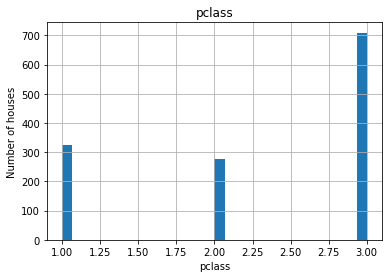

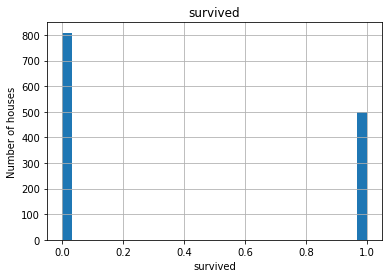

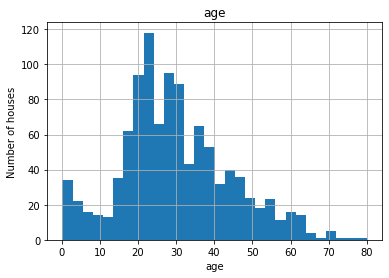

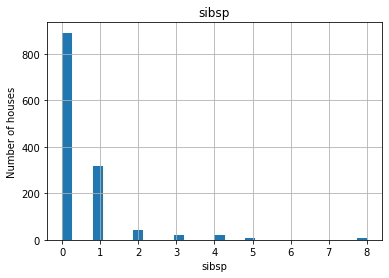

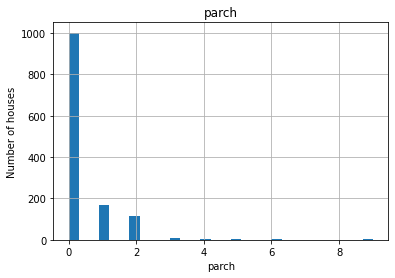

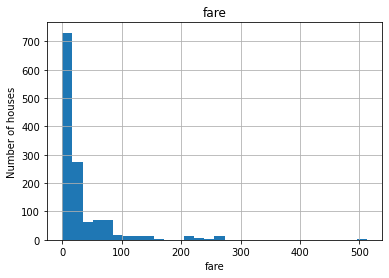

In [355]:
def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in vars_num:
    analyse_continuous(data, var)

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [356]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [357]:
X_train["cabin"] = [a[0] if type(a) == str else a for a in X_train.cabin]
X_test["cabin"] = [a[0] if type(a) == str else a for a in X_test.cabin]

### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [358]:
for var in vars_num_na:
    X_train[var+"_na"] = np.where(X_train[var].isnull(),1,0)
    X_test[var+"_na"] = np.where(X_test[var].isnull(),1,0)
    median = X_train[var].median()
    X_train[var] = X_train[var].fillna(median)
    X_test[var] = X_test[var].fillna(median)

### Replace Missing data in categorical variables with the string **Missing**

In [359]:
X_train[vars_cat_na] = X_train[vars_cat_na].fillna("Missing")
X_test[vars_cat_na] = X_test[vars_cat_na].fillna("Missing")

In [360]:
vars_cat

['sex', 'cabin', 'embarked', 'title']

In [361]:
X_train.sex

1118      male
44      female
1072      male
1130    female
574       male
         ...  
763     female
835       male
1216    female
559     female
684     female
Name: sex, Length: 1047, dtype: object

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [362]:
for var in vars_cat:
    if var != "survived":
        frequent_ls = analyse_rare_labels(X_train,var,0.05)
        print(frequent_ls)
        X_train[var] = np.where(X_train[var].isin(frequent_ls),"Rare",X_train[var])
        X_test[var] = np.where(X_test[var].isin(frequent_ls),"Rare",X_test[var])

Index([], dtype='object')
Index(['B', 'D', 'E', 'A', 'F', 'G', 'T'], dtype='object')
Index(['Missing'], dtype='object')
Index(['Master', 'Other'], dtype='object')


In [363]:
for var in vars_cat:
    print(X_train[var].value_counts())

male      663
female    384
Name: sex, dtype: int64
Missing    803
Rare       166
C           78
Name: cabin, dtype: int64
S       743
C       205
Q        97
Rare      2
Name: embarked, dtype: int64
Mr      596
Miss    210
Mrs     167
Rare     74
Name: title, dtype: int64


In [364]:
X_train["title"]

1118      Mr
44      Miss
1072      Mr
1130    Miss
574       Mr
        ... 
763     Miss
835       Mr
1216    Miss
559     Miss
684      Mrs
Name: title, Length: 1047, dtype: object

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [365]:
X_train = pd.get_dummies(X_train,prefix=vars_cat, columns=vars_cat, drop_first=True)
X_test = pd.get_dummies(X_test,prefix=vars_cat, columns=vars_cat, drop_first=True)

In [366]:
columns = [cols for cols in X_test]

### Scale the variables

- Use the standard scaler from Scikit-learn

In [367]:
scale = StandardScaler()
scale.fit(X_train[columns])
X_train[columns] = scale.transform(X_train[columns])
X_test[columns] = scale.transform(X_test[columns])

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [368]:
model = LogisticRegression(C=0.0005, random_state=0)

In [369]:
model.fit(X_train[columns],y_train)

LogisticRegression(C=0.0005, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [370]:
predict = model.predict(X_test)

That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**

In [372]:
roc = roc_auc_score(y_test, predict)
accuracy= accuracy_score(y_test, predict)

In [373]:
print("roc and accuracy are {} and {}".format(roc, accuracy))

roc and accuracy are 0.61 and 0.7022900763358778
